<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Loan_Tap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: LoanTap Logistic Regression
### Objective 
*  LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

* The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

#### Import Packages

In [1]:
# Import required packages
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Libs
import pandas as pd #data processing using DataFrames
import numpy as np #Numrical calculations
from sklearn.preprocessing import LabelEncoder, StandardScaler 
#Plotting Libs
import re
from datetime import datetime
 
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import plotly.express as px # plotting
#Statistics Libs


#### Import & Load data

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921")

# Statistical Summary

### Meta-data of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Description of the dataframe

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [6]:
# only object type columns
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Shape of the data

In [7]:
### Data shape
print("Loan Top dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Loan Top dataset has 396030 rows and 27 columns.


### Size & Count

In [8]:
# total number of elements/records 
df.size

10692810

### Column Names

In [9]:
# Columna names
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

* loan_amnt :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

### Column data typess

In [10]:
### Data type of all attributes
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

# Data Pre-processing

### Check for Missing Values

In [11]:
# Missing Values

print("Total missing values in Dataset " + str(df.isnull().sum().sum()))
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values[null_values["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 81589


,Null Values,Percentage Null Value
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


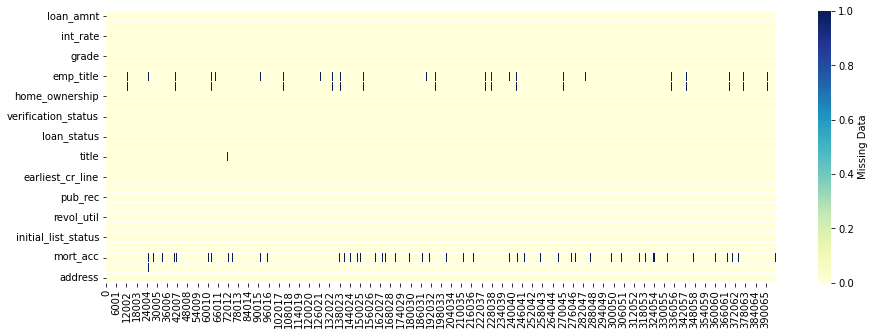

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [13]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['emp_title'].fillna('unknown_Emp_title', inplace=True)

In [14]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['emp_length'].fillna(method="ffill", inplace=True)

In [15]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['mort_acc'].fillna(df['mort_acc'].median(), inplace=True)

In [16]:
# Since the number of missing item is less we can remove row with null in title, pub_rec_bankruptcies, revol_util . 
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

0

#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [18]:
# duplicates
df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

In [19]:

pd.set_option('display.max_columns', None)
df.head(4)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"


### Dataset Copy

### Feature Engineering

In [79]:
# Take a working copy of the given dataset
work_df = df.copy()

In [80]:
# Splitting the month and years from issue_d_month & earliest_cr_line_year
work_df['issue_d_month'], work_df['issue_d_year'] = work_df['issue_d'].str.split('-', 1).str
work_df['earliest_cr_line_month'], work_df['earliest_cr_line_year'] = work_df['earliest_cr_line'].str.split('-', 1).str

In [81]:
# Get the city Code and Pin from Address
work_df[ 'city_state_zip'] = work_df['address'].astype(str).str[-8:]


In [82]:
#splitting this pin and city code with regex
work_df['pin'] = work_df['city_state_zip'].str.extract(r'\b(\d{5})\b', expand=False)
work_df['city_code'] = work_df['city_state_zip'].str.extract(r'\b(\w{2})\b', expand=False)
work_df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,city_state_zip,pin,city_code
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990,OK 22690,22690,OK
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Jan,2015,Jul,2004,SD 05113,05113,SD
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Jan,2015,Aug,2007,WV 05113,05113,WV


In [83]:
#Simple Feature Engineering steps:
#Creation of Flags    
pub_rec_fea = lambda value : 0 if(value == 0) else 1
mort_acc_fea= lambda value : 0 if(value == 0) else (1 if (value>=1) else value)
pub_rec_bankruptcies_fea= lambda value : 0 if(value == 0) else (1 if (value>=1) else value)

work_df['pub_rec'] = work_df.pub_rec.apply(pub_rec_fea)
 
work_df['mort_acc'] = work_df.mort_acc.apply(mort_acc_fea)
     
work_df['pub_rec_bankruptcies'] = work_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies_fea)

In [84]:
#let's make <1 yrs as 0 years and 10+ yrs to 10 years
work_df['emp_length'] = work_df['emp_length'].replace(['< 1 year'], '0 year')
work_df['emp_length'] = work_df['emp_length'].replace(['10+ years'], '10 years')
work_df[['emp_len', 'emp_years']] = work_df['emp_length'].str.split(' ', expand=True)

work_df['emp_len'] = work_df['emp_len'].astype(int)

In [85]:
#Map the none and Any to other 
work_df['home_ownership'].replace({"NONE":"OTHER", "ANY": "OTHER"}, inplace=True)

In [86]:
# convert to int
term_values = {' 36 months': 36, ' 60 months': 60}
work_df['term'] = work_df['term'].map(term_values)

In [87]:
# Convert to date time
work_df['issue_d'] = pd.to_datetime(work_df['issue_d'])
work_df['earliest_cr_line'] = pd.to_datetime(work_df['earliest_cr_line'])

In [88]:
#get current Date year

now = datetime.now()

work_df['cur_date'] = pd.Series([now.date() for x in range(len(work_df.index))])
work_df['cur_date'] = pd.to_datetime(work_df['cur_date'])


In [89]:
# calculating the Tenure by subtracting the curdate in month
work_df['tenure'] = (12 * (work_df['cur_date'].dt.year - work_df['issue_d'].dt.year) + (work_df['cur_date'].dt.month - work_df['issue_d'].dt.month))
work_df['credit_line_Tenure'] = (12 * (work_df['cur_date'].dt.year - work_df['earliest_cr_line'].dt.year) + (work_df['cur_date'].dt.month - work_df['earliest_cr_line'].dt.month))


In [90]:
# Drop the address 'earliest_cr_line','issue_d','emp_length', 'emp_years','city_state_zip','cur_date' column as it may not have much significant for our analysis
work_df.drop(['address','earliest_cr_line','issue_d','emp_length', 'emp_years','city_state_zip','cur_date'], axis='columns', inplace=True)

In [91]:
work_df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,pin,city_code,emp_len,tenure,credit_line_Tenure
0,10000.0,36,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,Jan,2015,Jun,1990,22690,OK,10,97.0,392.0
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,Jan,2015,Jul,2004,05113,SD,4,97.0,223.0
2,15600.0,36,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,Jan,2015,Aug,2007,05113,WV,0,97.0,186.0


In [92]:
work_df.isnull().sum().sum()

5090

In [93]:

# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
work_df['tenure'].fillna(method="ffill", inplace=True)
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'

work_df['credit_line_Tenure'].fillna(work_df['credit_line_Tenure'].median(), inplace=True)

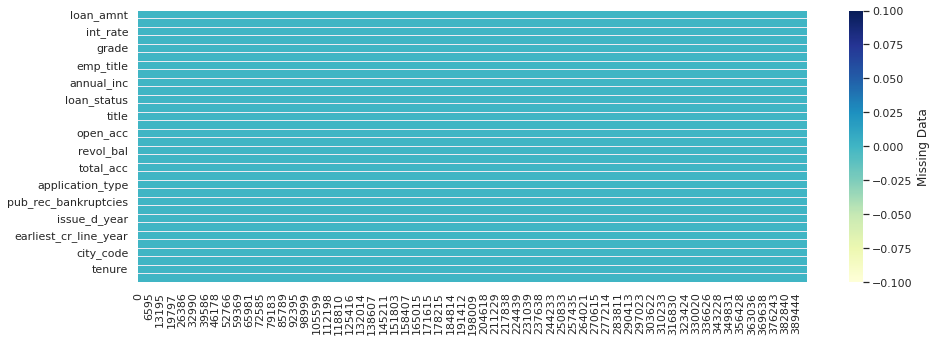

In [94]:
plt.figure(figsize=(15,5))
sns.heatmap(work_df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [95]:
print("Total missing values in Dataset " + str(work_df.isnull().sum().sum()))
null_value= pd.DataFrame({"Null Values" : work_df.isna().sum(),
                           "Percentage Null Value": (work_df.isna().sum()/(work_df.shape[0])*(100))})
null_value[null_value["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 0


,Null Values,Percentage Null Value


In [96]:
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object','datetime64')]
num_features

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_len',
 'tenure',
 'credit_line_Tenure']

In [98]:
# categorical_features
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'pin',
 'city_code']

In [39]:

def percentage_outliers(df, column_name):
    data = df[column_name]
    
    # calculate the upper and lower bounds for outliers
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # identify outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    # calculate the percentage of outliers
    percentage = (len(outliers) / len(df)) * 100
    outlier_count=len(outliers)
    
    return percentage, outlier_count

In [40]:
def outlier_summary(num_features):
  out_per=pd.DataFrame({'Column': [],	'percentage': [], 'count':[]})
  for cols in num_features:
    #print(cols)
    #print(cols.type)
    per, out_count=percentage_outliers(work_df, cols)
    #print(per)
    new_row={'Column':cols, 'percentage':per,'count':out_count}
    out_per = out_per.append(new_row, ignore_index=True)
  return out_per
   
out_sum=outlier_summary(num_features)
out_sum

,Column,percentage,count
0,loan_amnt,0.046002,181.0
1,term,23.748237,93441.0
2,int_rate,0.944430,3716.0
3,installment,2.831001,11139.0
4,annual_inc,4.214098,16581.0
5,dti,0.065063,256.0
6,open_acc,2.599469,10228.0
7,pub_rec,14.586050,57391.0
8,revol_bal,5.360070,21090.0
9,revol_util,0.002796,11.0


In [54]:
def outlierAnalysis(x):
  Q3, Q1 = np.percentile(work_df[x], [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(work_df[x].mean(),2)
  median = round(work_df[x].median(),2)
  mode = round(work_df[x].mode(), 2)
  print("----------------------------------------------------------")
  print("For the given sample " + x +"Analysis is as Follows: ")
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("Mean: ", round(work_df[x].mean(),2))
  print("Median: ", work_df[x].median())
  print("Mode: " , round(work_df[x].mode(), 2))
  print("IQR: " , IQR)
  print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier) 
  print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)

In [ ]:
for i in num_features:
  outlierAnalysis(i)

----------------------------------------------------------
For the given sample loan_amntAnalysis is as Follows: 
Q1:  7200.0
Q3:  17500.0
Mean:  12869.53
Median:  11850.0
Mode:  0    10000.0
dtype: float64
IQR:  10300.0
Maximum loan_amnt Excluding Outlier:  32950.0
Minimum loan_amnt Purchase Excluding Outlier:  -8250.0
----------------------------------------------------------
For the given sample termAnalysis is as Follows: 
Q1:  36.0
Q3:  36.0
Mean:  41.66
Median:  36.0
Mode:  0    36
dtype: int64
IQR:  0.0
Maximum term Excluding Outlier:  36.0
Minimum term Purchase Excluding Outlier:  36.0
----------------------------------------------------------
For the given sample int_rateAnalysis is as Follows: 
Q1:  10.65
Q3:  16.55
Mean:  13.72
Median:  13.35
Mode:  0    10.99
dtype: float64
IQR:  5.9
Maximum int_rate Excluding Outlier:  25.400000000000002
Minimum int_rate Purchase Excluding Outlier:  1.799999999999999
----------------------------------------------------------
For the given 

In [41]:
work_df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,393465.0,14117.269960,8353.190693,500.00,8000.00,12000.00,20000.00,40000.00
term,393465.0,41.699577,10.212979,36.00,36.00,36.00,36.00,60.00
int_rate,393465.0,13.638728,4.468866,5.32,10.49,13.33,16.49,30.99
installment,393465.0,431.946979,250.582348,16.08,250.33,375.43,567.49,1533.81
annual_inc,393465.0,74212.294265,61628.502516,0.00,45000.00,64000.00,90000.00,8706582.00
dti,393465.0,17.383396,18.061993,0.00,11.29,16.91,22.98,9999.00
open_acc,393465.0,11.317601,5.133143,1.00,8.00,10.00,14.00,90.00
pub_rec,393465.0,0.145860,0.352967,0.00,0.00,0.00,0.00,1.00
revol_bal,393465.0,15849.758057,20552.685648,0.00,6042.00,11194.00,19630.00,1743266.00
revol_util,393465.0,53.828586,24.434544,0.00,35.90,54.90,72.90,892.30


### Outlier Treatment

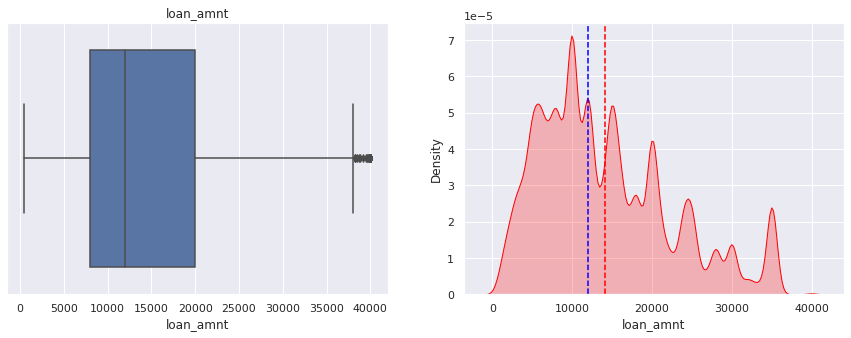

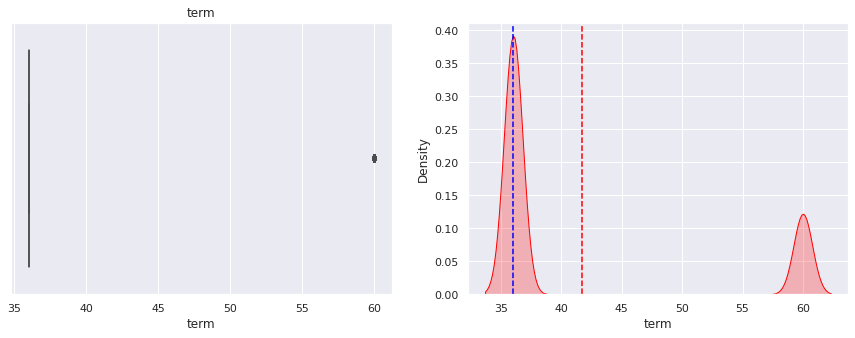

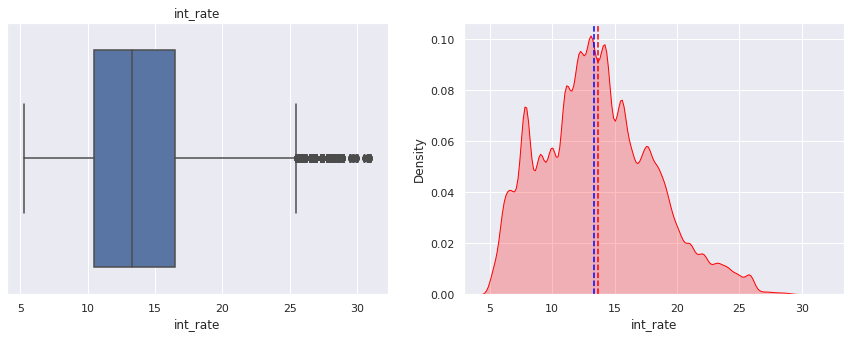

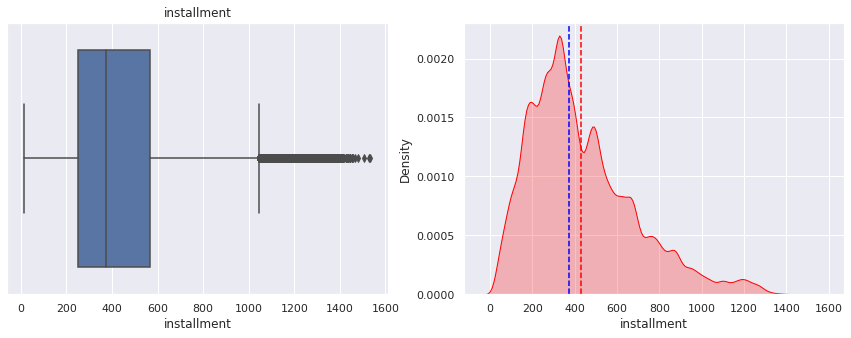

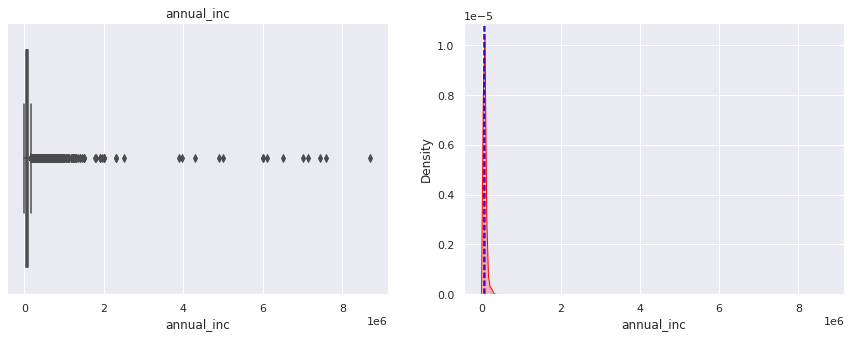

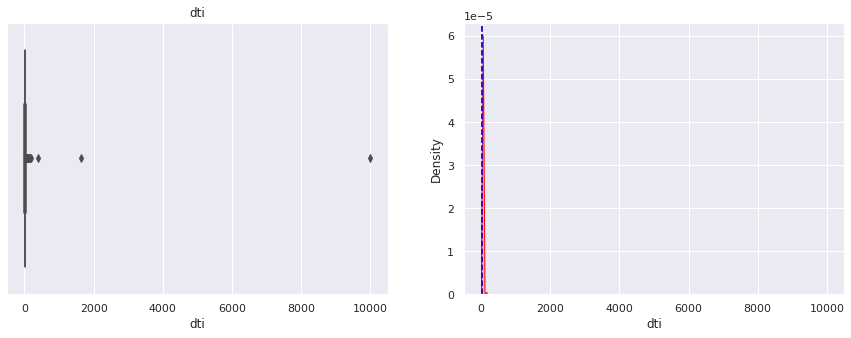

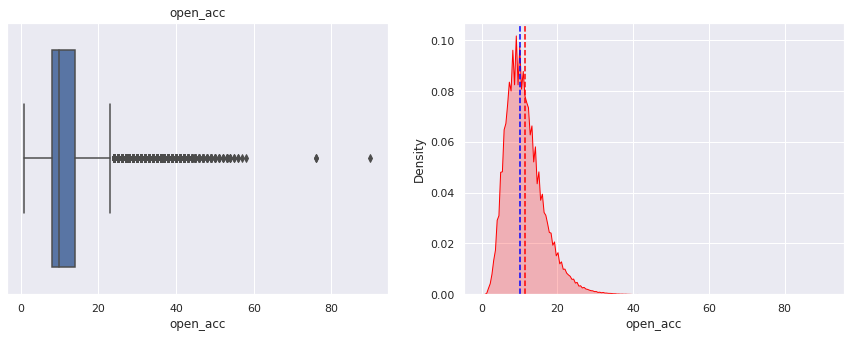

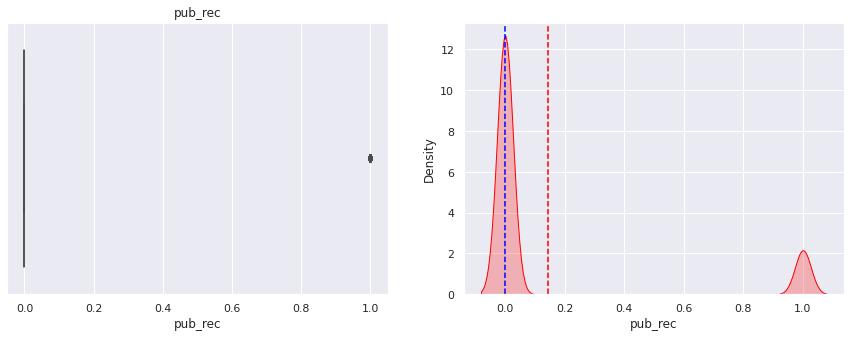

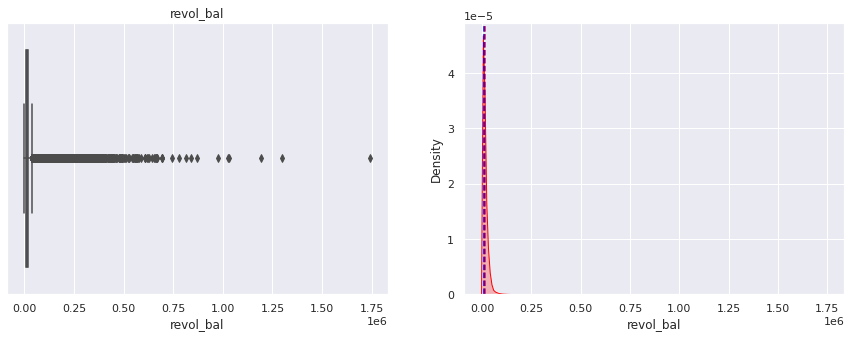

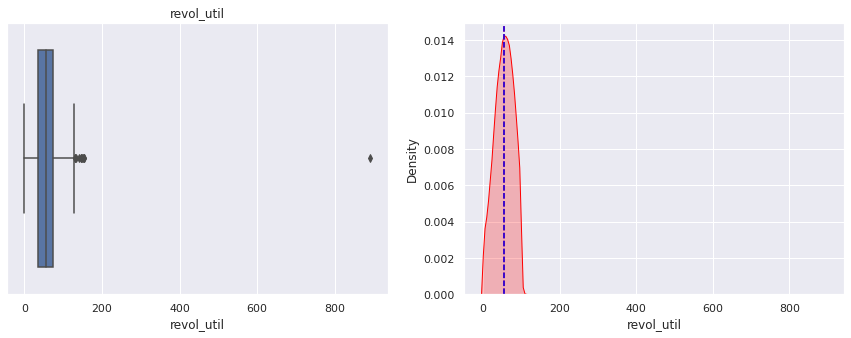

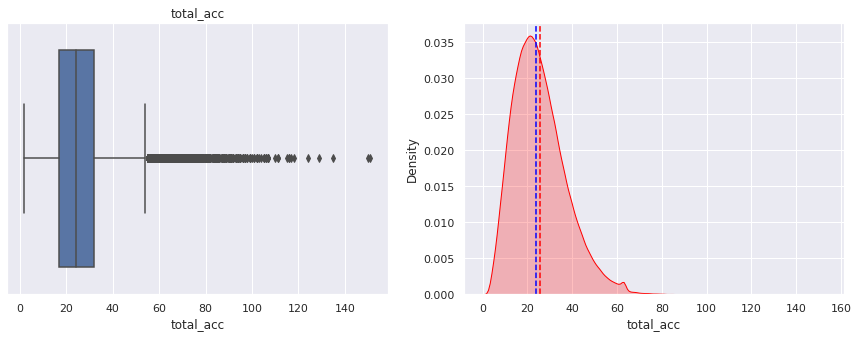

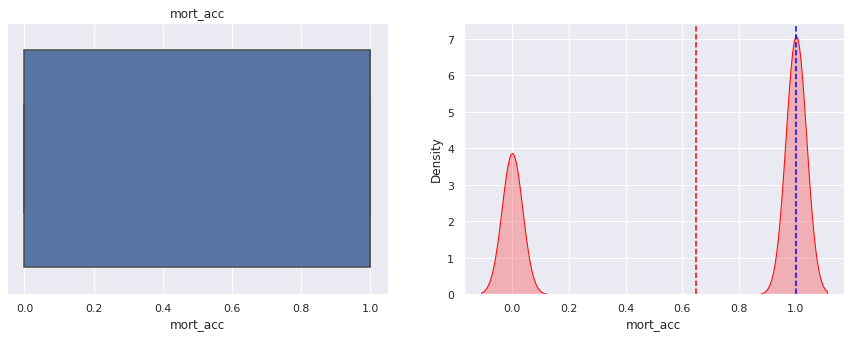

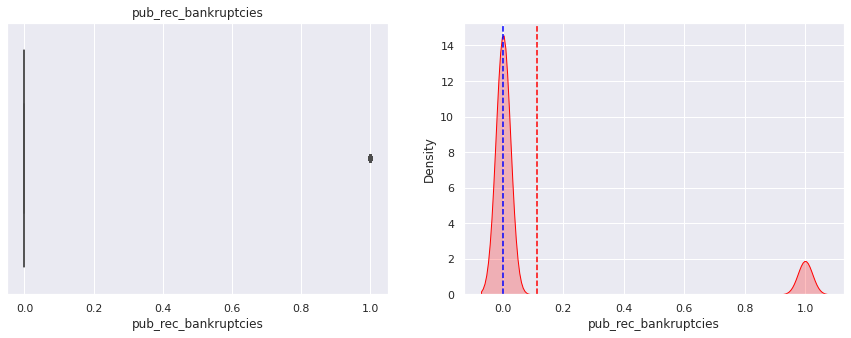

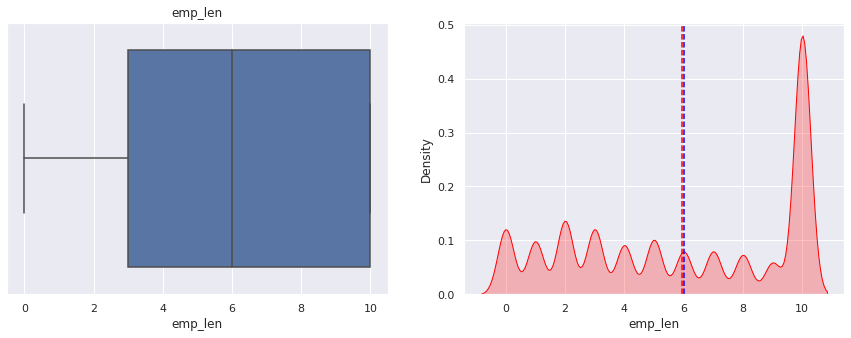

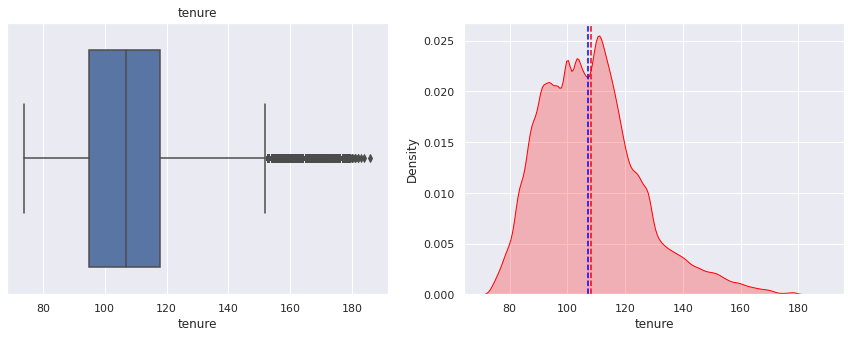

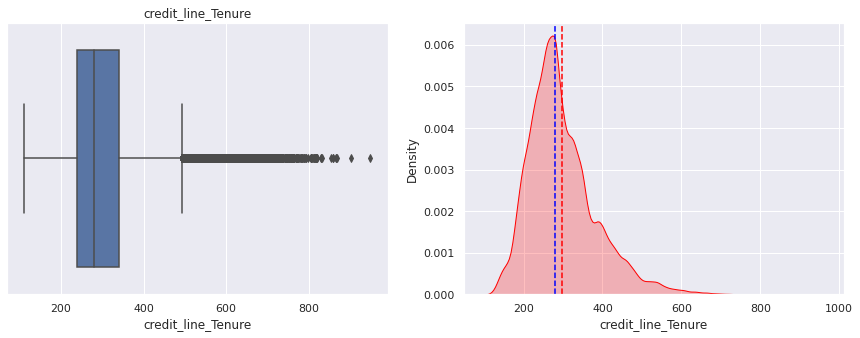

['loan_amnt',
 'term',
 'installment',
 'annual_inc',
 'revol_bal',
 'credit_line_age',
 'loan_age']

In [43]:
sns.set_theme(style='darkgrid')

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=work_df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=work_df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=work_df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

In [47]:

for i, j in enumerate(['loan_amnt',
 'installment','total_acc','dti',
 'annual_inc',
 'revol_bal','revol_util','tenure','credit_line_Tenure']):
  q1 = work_df[j].quantile(0.25)
  q3 = work_df[j].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  work_df = work_df[(work_df[j] >= lower_bound) & (work_df[j] <= upper_bound)]     

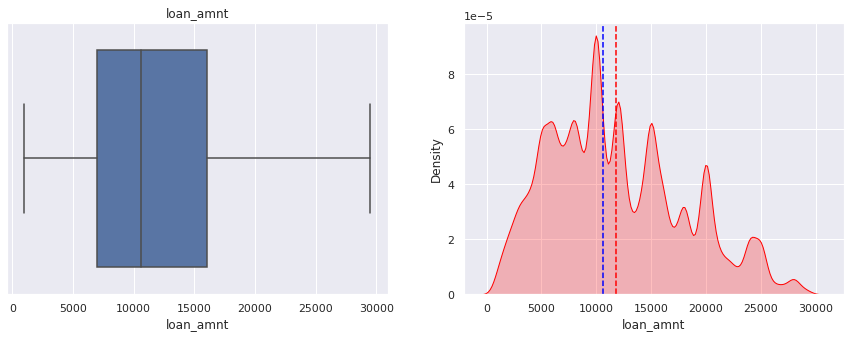

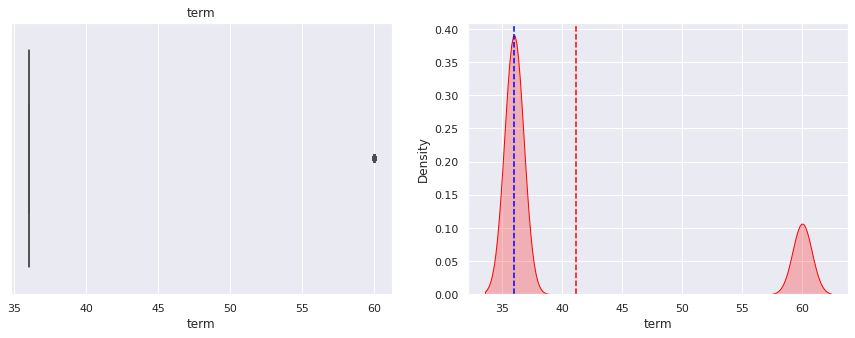

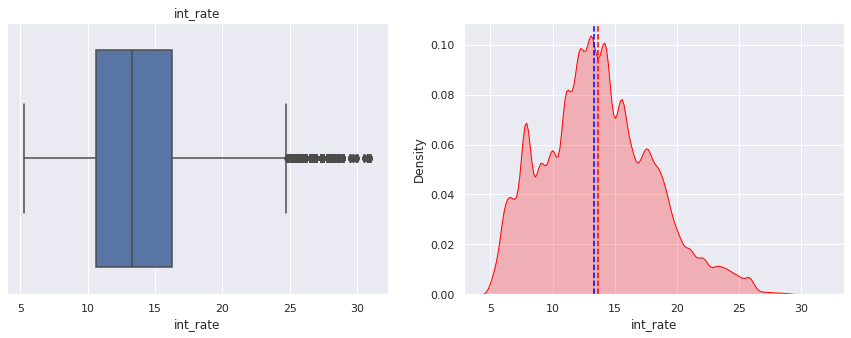

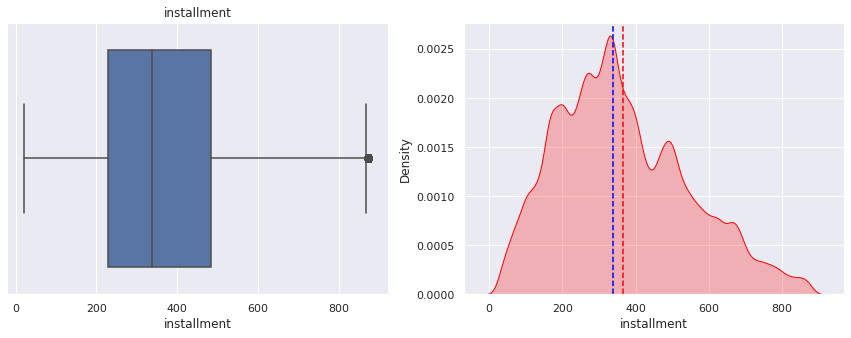

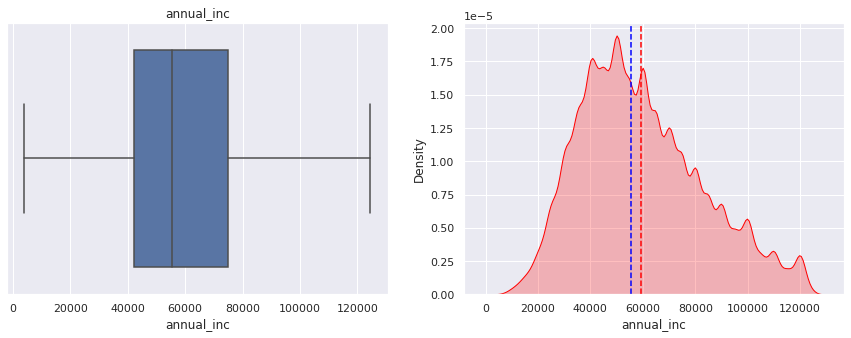

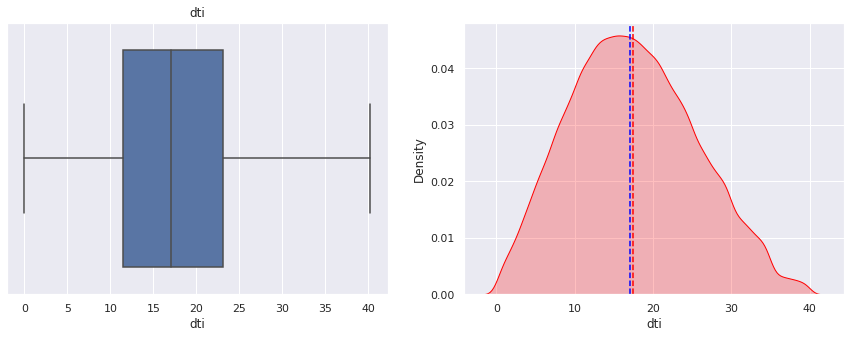

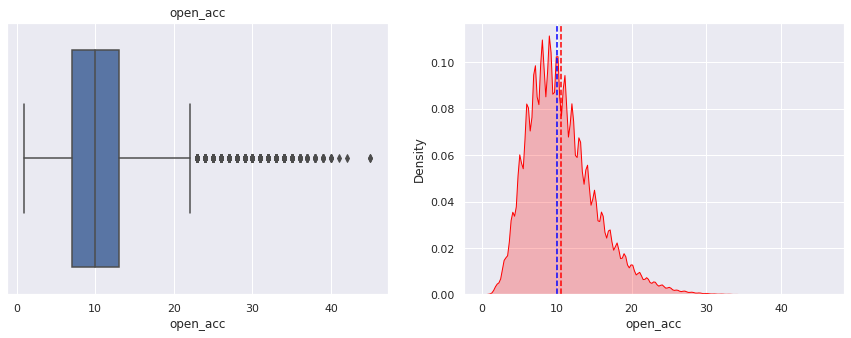

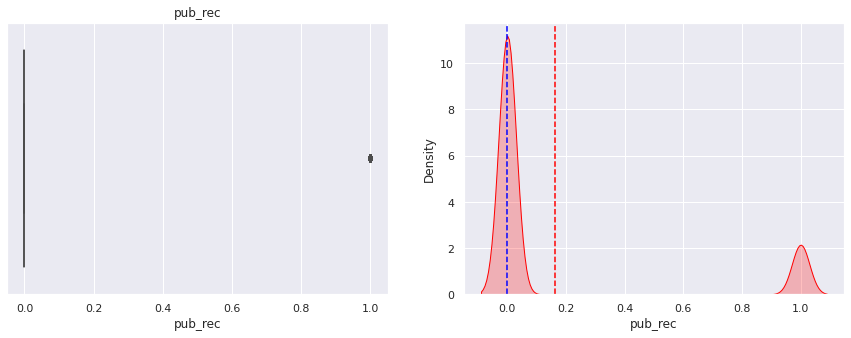

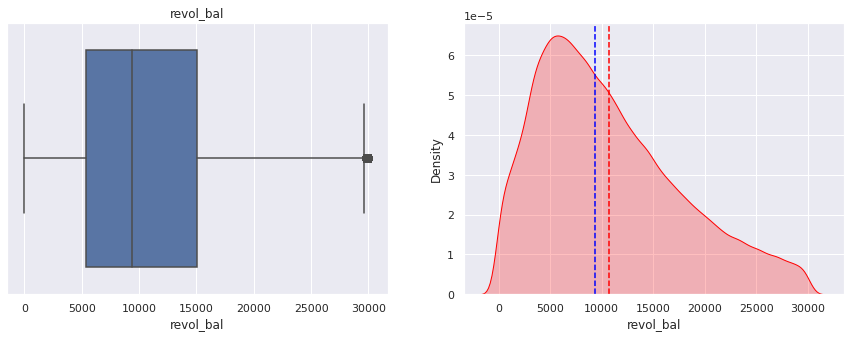

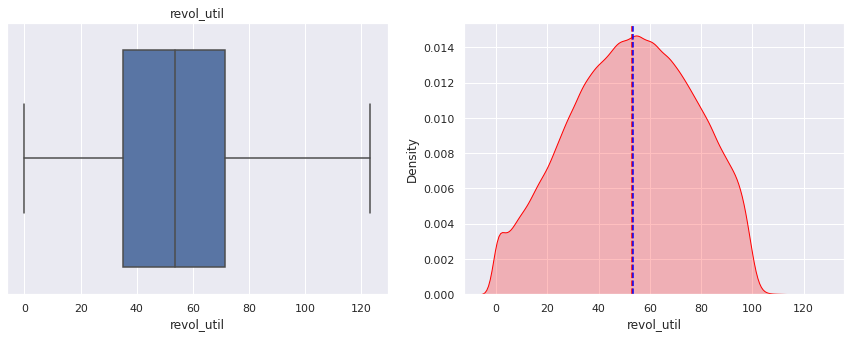

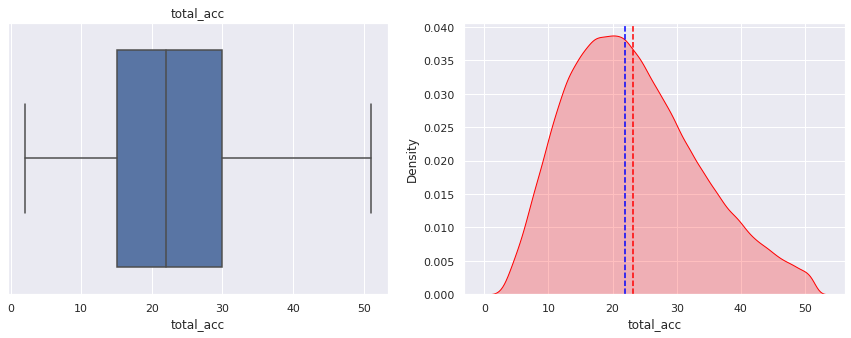

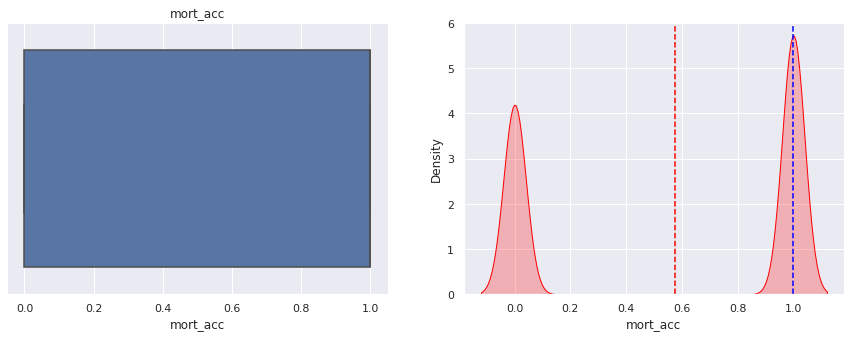

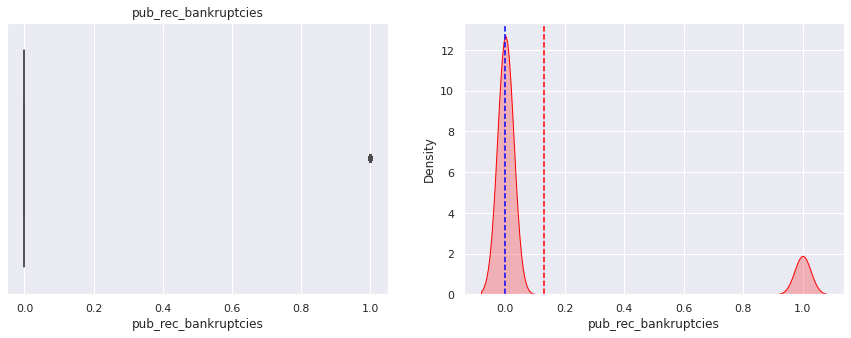

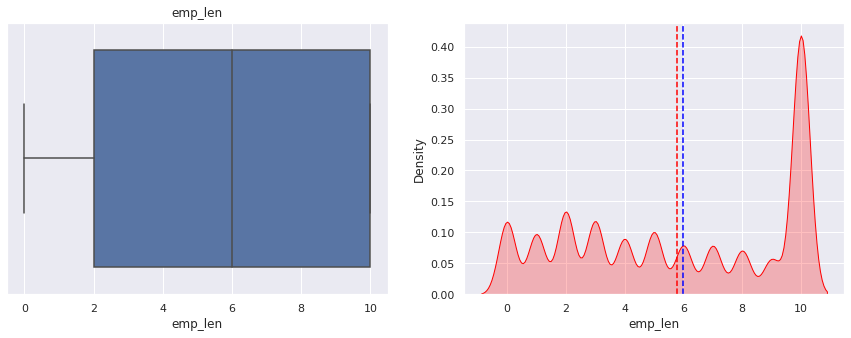

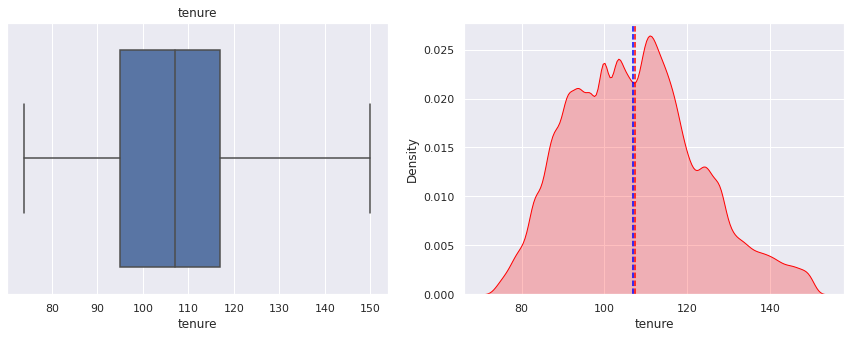

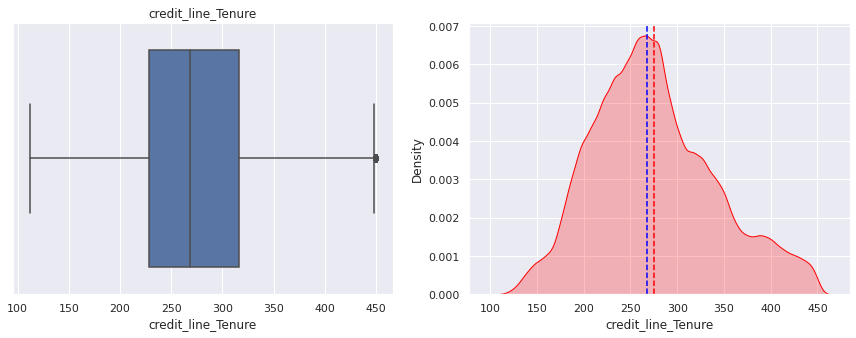

In [48]:
sns.set_theme(style='darkgrid')

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=work_df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=work_df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=work_df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

In [49]:
work_df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,281569.0,11822.828330,6173.651814,1000.00,7000.00,10625.00,16000.00,29500.00
term,281569.0,41.149146,9.852215,36.00,36.00,36.00,36.00,60.00
int_rate,281569.0,13.652799,4.372963,5.32,10.65,13.33,16.29,30.99
installment,281569.0,364.328270,179.409440,21.62,229.54,338.41,485.07,878.81
annual_inc,281569.0,59442.781334,23512.868095,4000.00,42000.00,55500.00,75000.00,124500.00
dti,281569.0,17.423759,8.044848,0.00,11.42,17.00,23.04,40.23
open_acc,281569.0,10.609740,4.563489,1.00,7.00,10.00,13.00,45.00
pub_rec,281569.0,0.160959,0.367494,0.00,0.00,0.00,0.00,1.00
revol_bal,281569.0,10754.345588,6948.072373,0.00,5343.00,9405.00,15041.00,30173.00
revol_util,281569.0,52.933936,24.041502,0.00,35.20,53.60,71.50,123.20


### Data categories

# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

#### Value Counts

In [50]:

work_df.nunique()

loan_amnt                  1135
term                          2
int_rate                    424
installment               43648
grade                         7
sub_grade                    35
emp_title                130791
home_ownership                4
annual_inc                19717
verification_status           3
loan_status                   2
purpose                      14
title                     34391
dti                        4004
open_acc                     43
pub_rec                       2
revol_bal                 29635
revol_util                 1163
total_acc                    50
initial_list_status           2
application_type              3
mort_acc                      2
pub_rec_bankruptcies          2
issue_d_month                12
issue_d_year                  9
earliest_cr_line_year        47
pin                          10
city_code                    54
emp_len                      11
tenure                       77
credit_line_Tenure          339
dtype: i

In [51]:
# Number of unique records for each columns
cat_cols=[]
i=0
for col in work_df.columns:
  if len(work_df[col].unique())<=50:
    print(col,len(work_df[col].unique()))
    cat_cols.append(col)
    i=i+1
print(i)
print(cat_cols)

term 2
grade 7
sub_grade 35
home_ownership 4
verification_status 3
loan_status 2
purpose 14
open_acc 43
pub_rec 2
total_acc 50
initial_list_status 2
application_type 3
mort_acc 2
pub_rec_bankruptcies 2
issue_d_month 12
issue_d_year 9
earliest_cr_line_year 47
pin 10
emp_len 11
19
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'open_acc', 'pub_rec', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_year', 'pin', 'emp_len']


### Graphical Analysis

#### Univariate Analysis

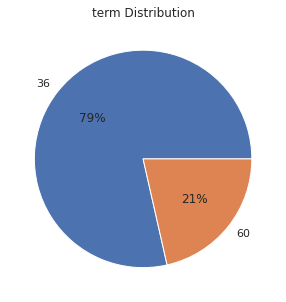

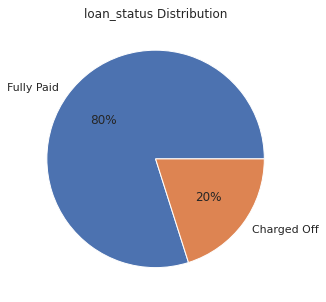

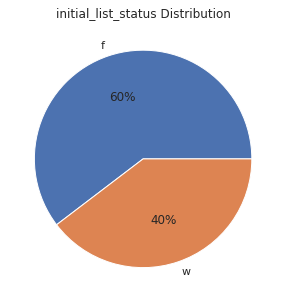

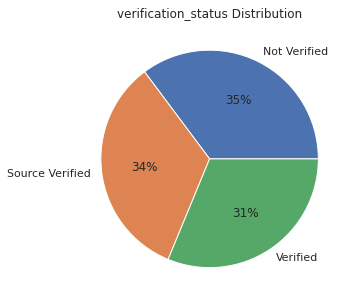

In [52]:
Cat_col=['term','loan_status','initial_list_status','verification_status']
i=1
for cols in Cat_col:
  
  plt.figure(figsize=(15,5))
  plt.pie(work_df[cols].value_counts(),labels=work_df[cols].unique() ,autopct='%.0f%%')
  plt.title(f'{cols} Distribution')
  plt.show()
  print()

#### **Observation**: 
* Both the loan Status has 80% paid and 20% users has defaulter
*  whole (W) has 40% or fractional (F) market has 60% in intial Status
* 36 Term is more than 60 term  
* Almost 65% user has been verfied but 35% is not verfied.    

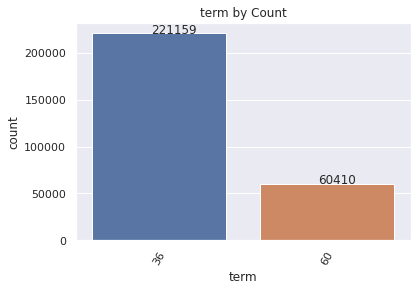

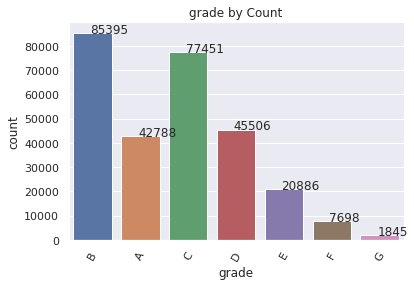

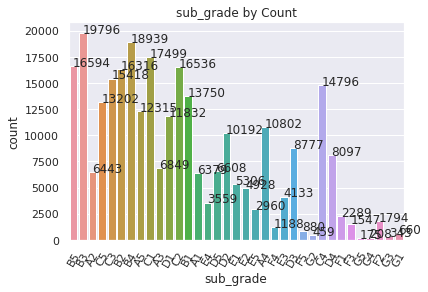

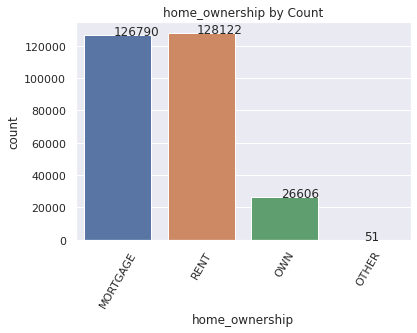

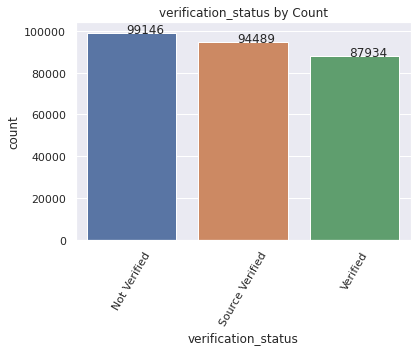

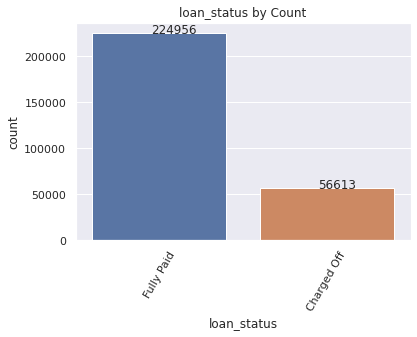

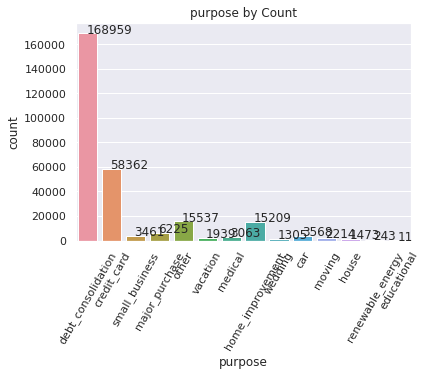

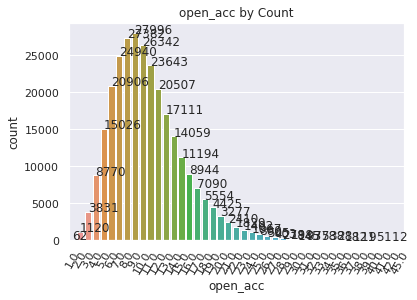

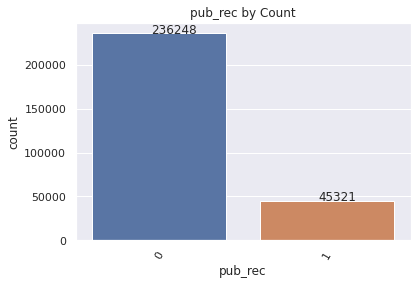

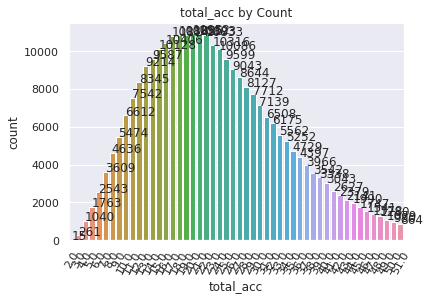

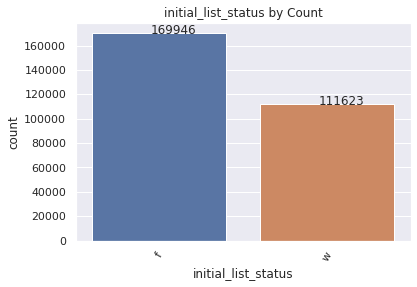

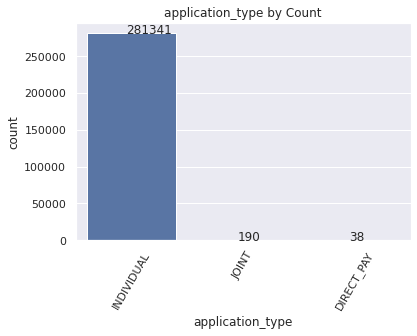

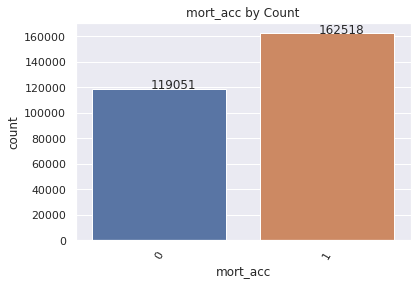

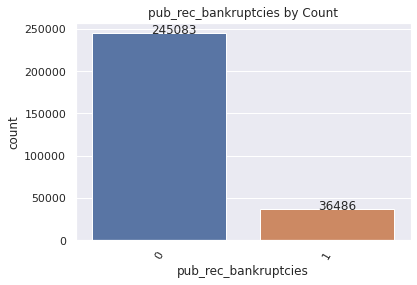

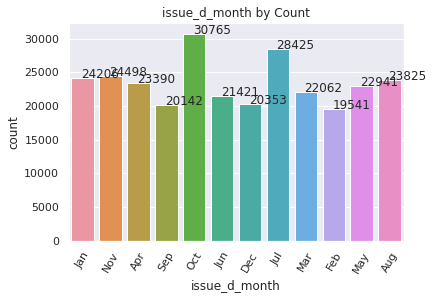

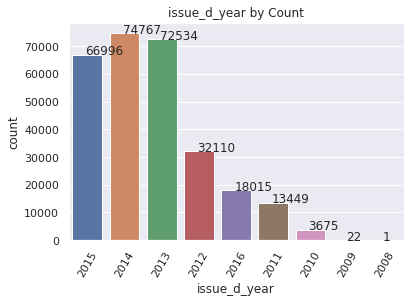

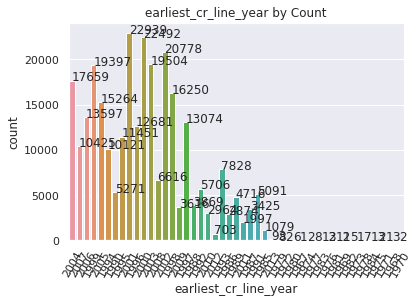

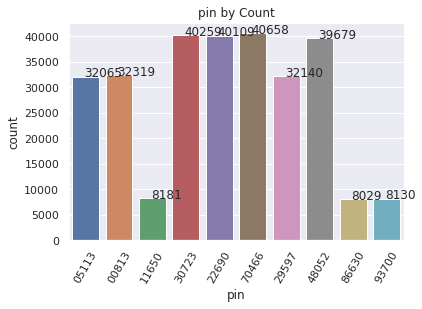

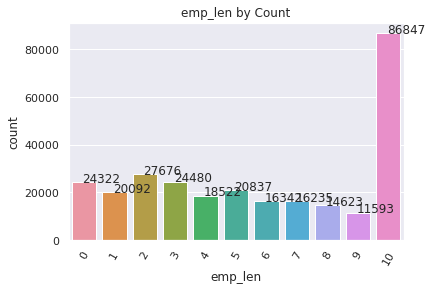

In [53]:
# Count plot of attributes

for col in cat_cols:
  #plt.figure(figsize=(15,5))
  ax = sns.countplot(data=work_df, x=col)
  plt.title(f"{col} by Count")
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=60)
  plt.show()
  print()


#### **Observation**: 
*   *Oct and Jul has more number of loan issued month *
*   *2013, 2014, and 2015 year has more number of issued loan during that Year *
*   *Almost 90% of the application is in Individual application*
*   *Most of the ownership come under rent and mortgage than own house.*

*   *Grade of the loan with A and B is very high*

*   *pin with 22690 30723 70466 and 48052 has more loan issued*
*   *Around 90% of the Employment length is has 10 year*

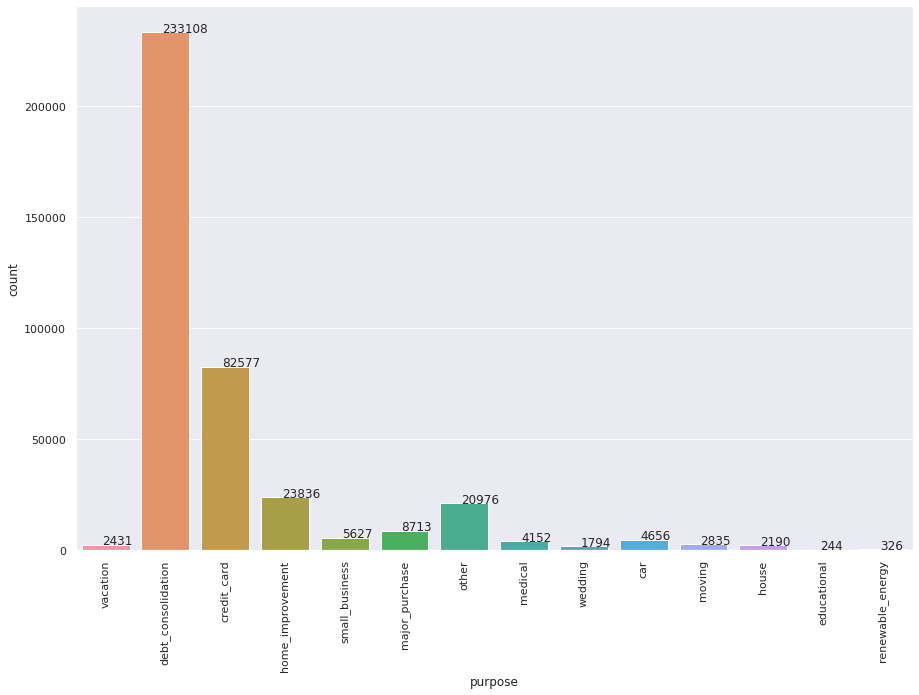

In [104]:
plt.figure(figsize=(15, 10))
g = sns.countplot(x='purpose', data=work_df )
g.set_xticklabels(g.get_xticklabels(), rotation=90);
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()



#### **Observation**: 
*  debt_consolidation, Credit_card, Home_imporvement is the highest purpose for taking loan 

#### Bivariate Analysis

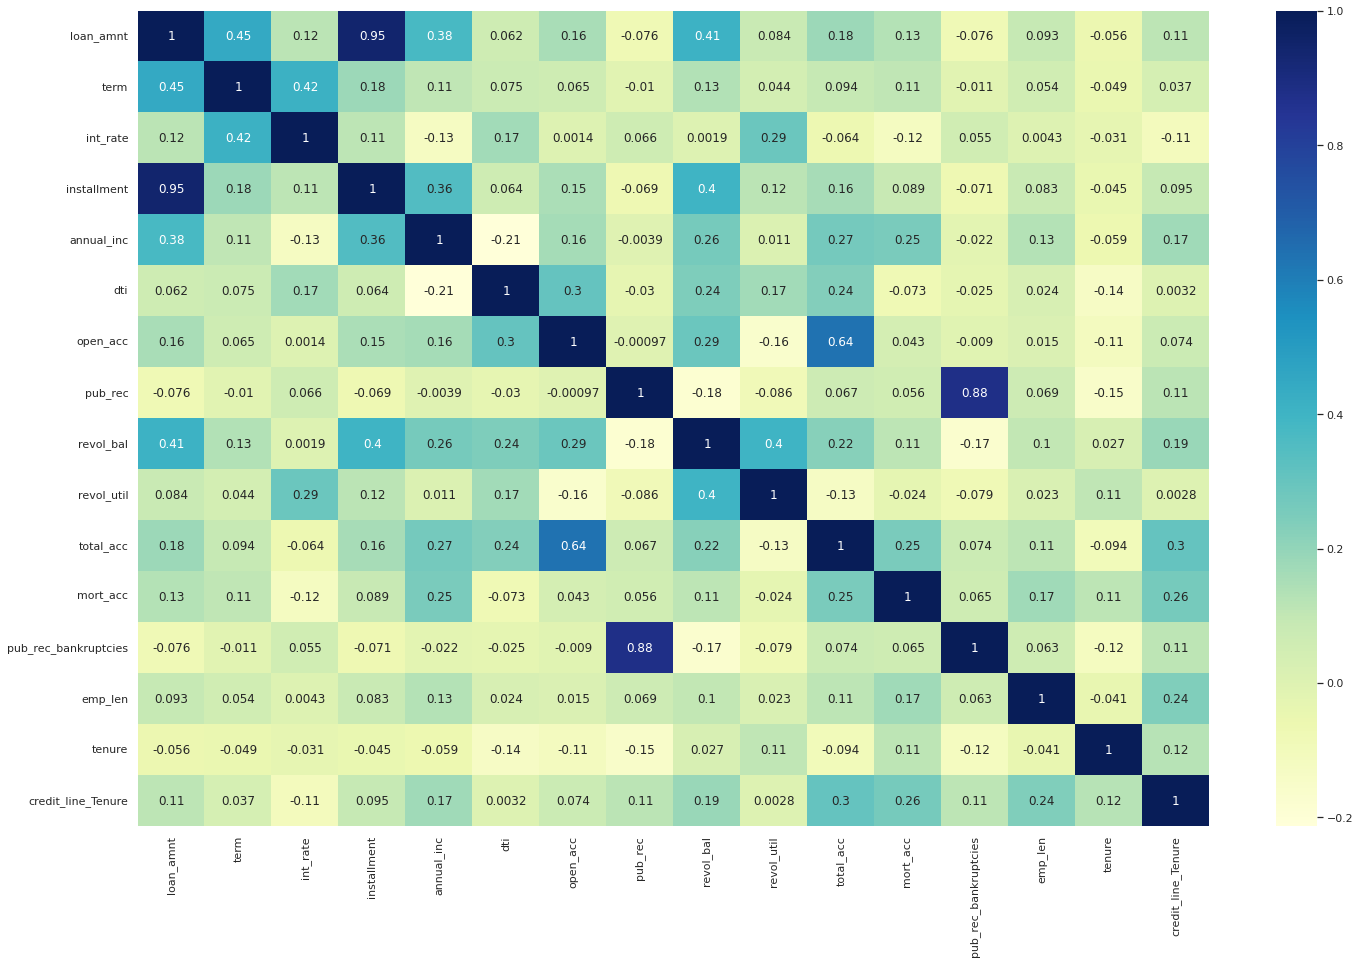

In [56]:
# Correlation check
plt.figure(figsize=(24,15))
sns.heatmap(work_df.corr(),annot=True,cmap="YlGnBu")

plt.show()

#### **Observation**: 
*  Has excepted loan_amt and installment is highly correlated 

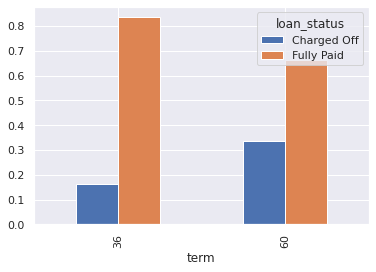

In [58]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["term"], 
           normalize="index").plot(kind="bar")

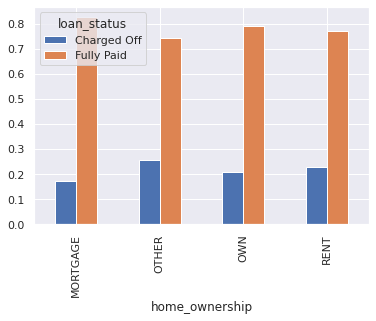

In [59]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["home_ownership"], 
           normalize="index").plot(kind="bar")

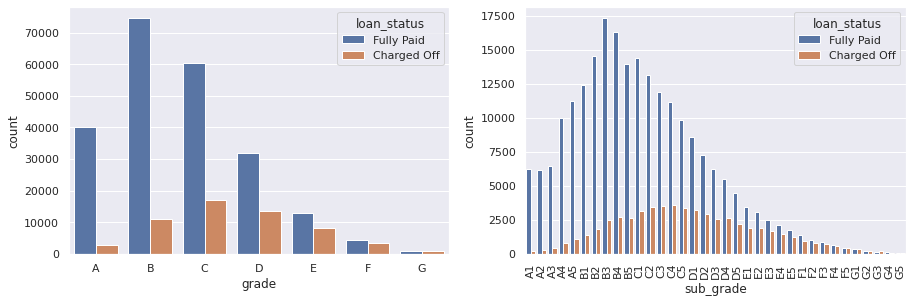

In [60]:

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(work_df.grade.unique().tolist())
sns.countplot(x='grade', data=work_df, hue='loan_status', order=grade)
plt.subplot(2, 2, 2)
sub_grade = sorted(work_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=work_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

###Observation 
* Most the defaulter has Grade's in B, C, D and E
* On other hand Grade with A, B and C has Fully paid And same apply's with sub_grade   

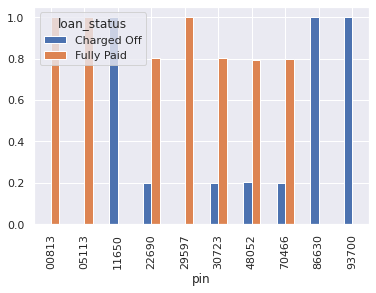

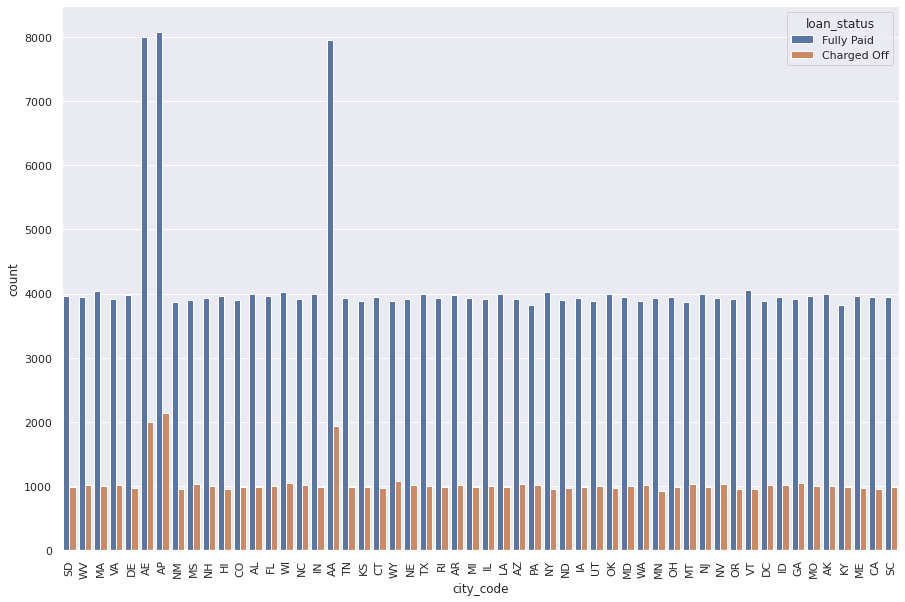

In [61]:
    

pd.crosstab(columns = work_df["loan_status"],
           index=work_df["pin"], 
           normalize="index").plot(kind="bar")
print()
plt.figure(figsize=(15, 10))
g = sns.countplot(x='city_code', data=work_df, hue='loan_status' )
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.show()

###Observation 
* 11650, 86630, and 93700 has many deafaulter when compared to other region 
* AE, AP and AA has more loan issued to this city code.       

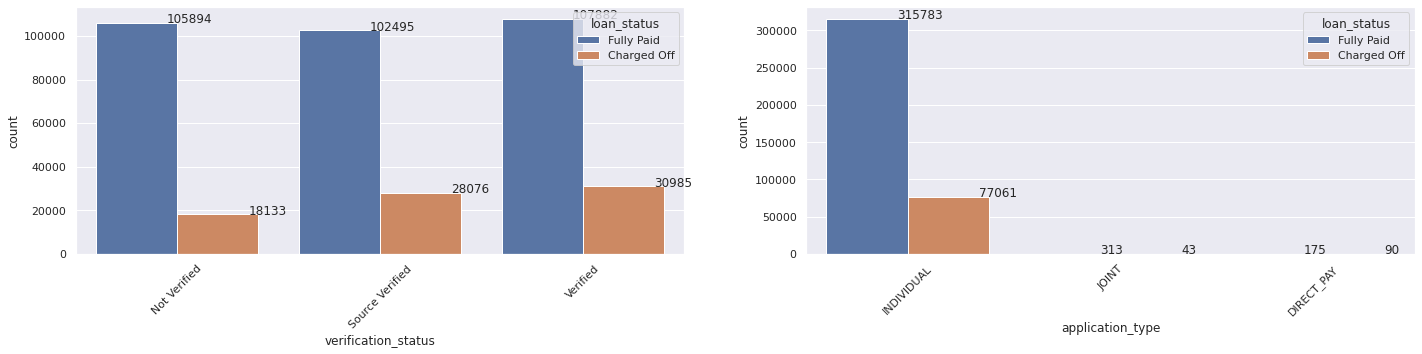

In [105]:

plt.figure(figsize=(24, 10))
plt.subplot(2, 2, 1)

ax=sns.countplot(x='verification_status', data=work_df, hue='loan_status')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
ax = sns.countplot(data=work_df, x='application_type',hue='loan_status')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=45)
plt.show()

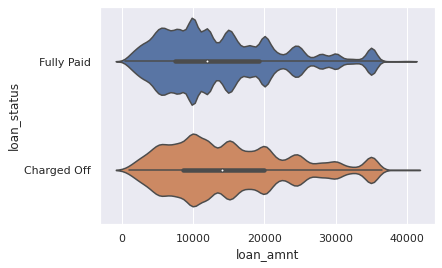

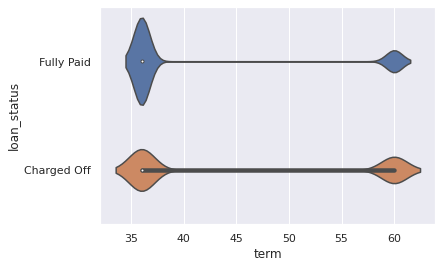

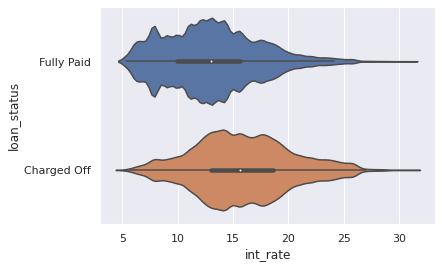

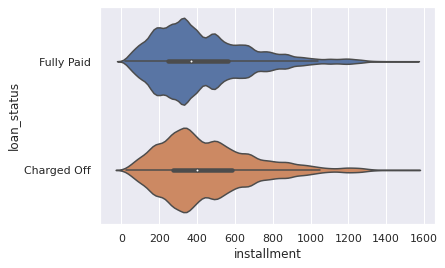

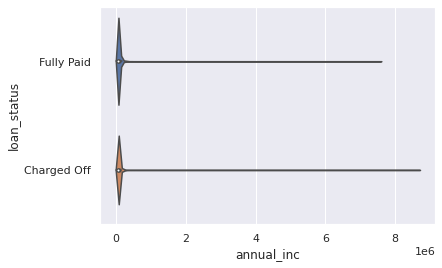

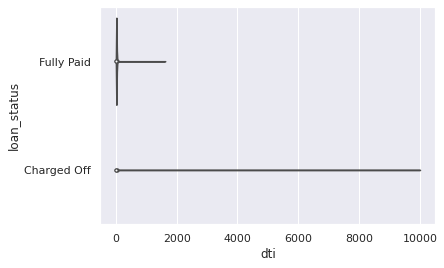

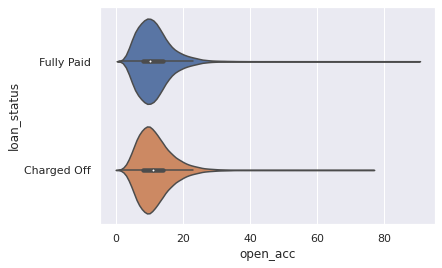

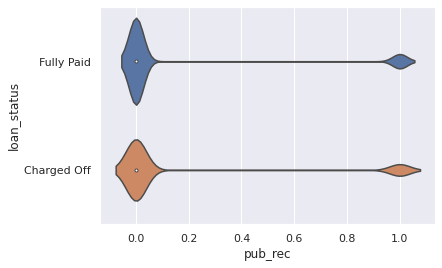

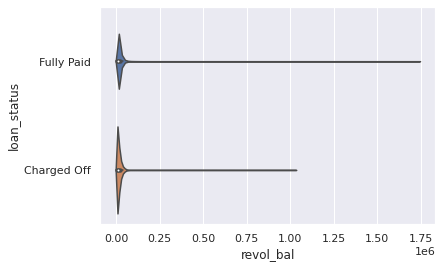

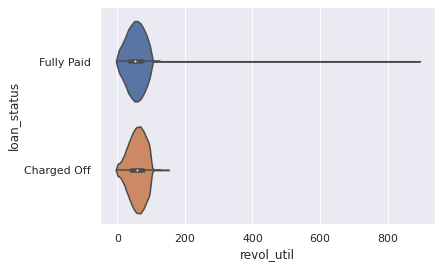

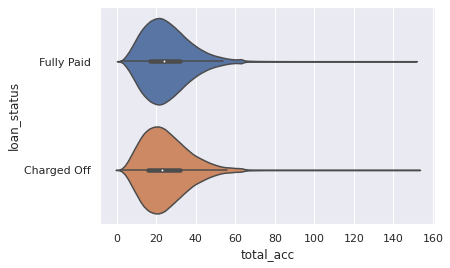

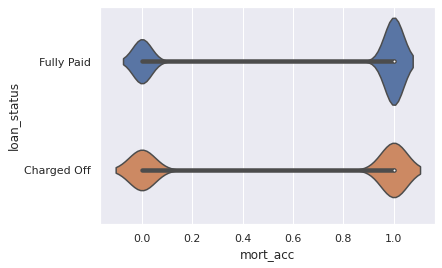

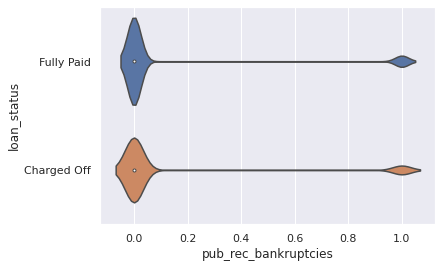

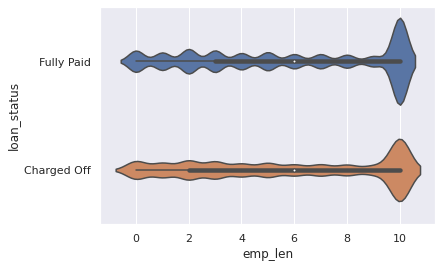

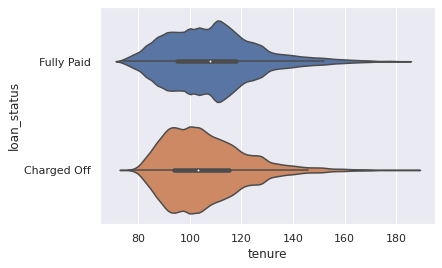

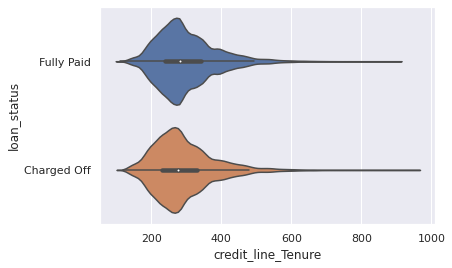

In [106]:
for i in num_features:
  sns.violinplot(data=work_df, x=i,y='loan_status')
  plt.show()
  print()

###Observation
* int_rate for full paid is less and charged off has a slight increase in int_rate   

In [64]:

work_df[cat_cols].head(2)

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,open_acc,pub_rec,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_year,pin,emp_len
1,36,B,B5,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,17.0,0,27.0,f,INDIVIDUAL,1,0,Jan,2015,2004,05113,4
2,36,B,B3,RENT,Source Verified,Fully Paid,credit_card,13.0,0,26.0,f,INDIVIDUAL,0,0,Jan,2015,2007,05113,0


In [107]:
label_encoder = LabelEncoder()
# Encode labels in column 'Country'.
work_df['grade']= label_encoder.fit_transform(work_df['grade'])
work_df['sub_grade']= label_encoder.fit_transform(work_df['sub_grade'])
work_df['home_ownership']= label_encoder.fit_transform(work_df['home_ownership'])

work_df['verification_status']= label_encoder.fit_transform(work_df['verification_status'])
work_df['purpose']= label_encoder.fit_transform(work_df['purpose'])
work_df['initial_list_status']= label_encoder.fit_transform(work_df['initial_list_status'])

work_df['application_type']= label_encoder.fit_transform(work_df['application_type'])
work_df['issue_d_month']= label_encoder.fit_transform(work_df['issue_d_month'])
work_df['earliest_cr_line_month']= label_encoder.fit_transform(work_df['earliest_cr_line_month'])

work_df['city_code']= label_encoder.fit_transform(work_df['city_code'])

In [108]:

work_df['emp_title']= label_encoder.fit_transform(work_df['emp_title'])

work_df['loan_status']= label_encoder.fit_transform(work_df['loan_status'])

In [109]:
work_df[cat_features].head(2)

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,pin,city_code
0,1,8,80531,3,0,1,12,Vacation,1,1,4,2015,6,1990,22690,39
1,1,9,33146,0,0,1,2,Debt consolidation,0,1,4,2015,5,2004,05113,44


In [110]:
ob_to_Int=['term','mort_acc','pub_rec_bankruptcies','issue_d_year','earliest_cr_line_year','pin','emp_len']
work_df['term'].astype(int)

work_df['mort_acc'].astype(int)
work_df['pub_rec_bankruptcies'].astype(int)
work_df['issue_d_year'].astype(int)
work_df['earliest_cr_line_year'].astype(int)
work_df['pin'].astype(int)

work_df['emp_len'].astype(int)

0         10
1          4
2          0
3          6
4          9
          ..
396025     2
396026     5
396027    10
396028    10
396029    10
Name: emp_len, Length: 393465, dtype: int64

In [111]:
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['title', 'issue_d_year', 'earliest_cr_line_year', 'pin']

In [112]:
work_df[['pin','issue_d_year']].value_counts()

pin    issue_d_year
30723  2014            14970
48052  2014            14602
70466  2014            14601
22690  2014            14534
70466  2013            14035
                       ...  
93700  2008               16
22690  2007                2
86630  2007                1
11650  2007                1
00813  2007                1
Length: 94, dtype: int64

In [113]:
work_df=work_df.drop(['title','emp_title'], axis=1)

In [114]:
# Independnet features
X = work_df.drop(['loan_status'], axis=1)
# Dependent feature
Target = work_df['loan_status']
X.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,pin,city_code,emp_len,tenure,credit_line_Tenure
396025,10000.0,60,10.99,217.38,1,8,3,40000.0,1,2,15.63,6.0,0,1990.0,34.3,23.0,1,1,0,0,10,2015,9,2004,30723,10,2,128.0,281.0
396026,21000.0,36,12.29,700.42,2,10,0,110000.0,1,2,21.45,6.0,0,43263.0,95.7,8.0,0,1,1,0,3,2015,3,2006,05113,21,5,128.0,281.0
396027,5000.0,36,9.99,161.32,1,5,3,56500.0,2,2,17.56,15.0,0,32704.0,66.9,23.0,0,1,0,0,10,2013,7,1997,70466,37,10,128.0,281.0
396028,21000.0,60,15.31,503.02,2,11,0,64000.0,2,2,15.88,9.0,0,15704.0,53.8,20.0,0,1,1,0,1,2012,9,1990,29597,12,10,128.0,281.0
396029,2000.0,36,13.61,67.98,2,11,3,42996.0,2,2,8.32,3.0,0,4292.0,91.3,19.0,0,1,1,0,6,2010,11,1998,48052,5,10,128.0,281.0


In [115]:
import statsmodels.api as sm
xt = sm.add_constant(X)

model = sm.OLS(Target, xt.astype(float)).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3110.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:32:02   Log-Likelihood:            -1.5432e+05
No. Observations:              393465   AIC:                         3.087e+05
Df Residuals:                  393435   BIC:                         3.090e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     36

* Columns with city_code, emp_len, earliest_cr_line_month,earliest_cr_line_year has high p-values than significance values 
* so we can remove the columns 

In [116]:
new_X = X.drop(['city_code', 'emp_len','earliest_cr_line_month','earliest_cr_line_year'], axis=1)
new_X.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,pin,tenure,credit_line_Tenure
0,10000.0,36,11.44,329.48,1,8,3,117000.0,0,12,26.24,16.0,0,36369.0,41.8,25.0,1,1,0,0,4,2015,22690,97.0,392.0
1,8000.0,36,11.99,265.68,1,9,0,65000.0,0,2,22.05,17.0,0,20131.0,53.3,27.0,0,1,1,0,4,2015,05113,97.0,223.0
2,15600.0,36,10.49,506.97,1,7,3,43057.0,1,1,12.79,13.0,0,11987.0,92.2,26.0,0,1,0,0,4,2015,05113,97.0,186.0
3,7200.0,36,6.49,220.65,0,1,3,54000.0,0,1,2.60,6.0,0,5472.0,21.5,13.0,0,1,0,0,9,2014,00813,99.0,197.0
4,24375.0,60,17.27,609.33,2,14,0,55000.0,2,1,33.95,13.0,0,24584.0,69.8,43.0,0,1,1,0,0,2013,11650,118.0,287.0


In [117]:
xt = sm.add_constant(new_X)
#model = sm.OLS(Target, xt).fit()
#fit regression model
model = sm.OLS(Target, xt.astype(float)).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3607.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:32:25   Log-Likelihood:            -1.5433e+05
No. Observations:              393465   AIC:                         3.087e+05
Df Residuals:                  393439   BIC:                         3.090e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   31.9879 

In [118]:
# Get the Train-Test split
from sklearn.model_selection import train_test_split
     
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(new_X, Target, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(236079, 25)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
model.coef_

array([[ 0.01244127, -0.19057704,  0.29452705, -0.0722307 ,  0.05727663,
        -0.79331261, -0.10019368,  0.19088224, -0.04200592, -0.03812048,
        -0.49896187, -0.11659501, -0.07482105,  0.05230763, -0.09962841,
         0.12001196,  0.02356661,  0.01508575,  0.07775885,  0.04867971,
        -0.00816047, -0.1671137 , -0.86111767, -0.10308176, -0.02763072]])

In [122]:
model.intercept_

array([1.78847341])

In [124]:
def logreg_to_dict(model, feature_names):
  coefs = np.concatenate([model.intercept_, model.coef_.squeeze()])
  return dict(zip(["intercept"] + feature_names, coefs))

print(logreg_to_dict(model, X.columns.tolist()))

{'intercept': 1.788473411172561, 'loan_amnt': 0.01244126758747042, 'term': -0.19057704277223333, 'int_rate': 0.2945270535422524, 'installment': -0.07223070282820927, 'grade': 0.0572766314616905, 'sub_grade': -0.7933126091210605, 'home_ownership': -0.10019367819815647, 'annual_inc': 0.1908822430439247, 'verification_status': -0.04200591849973537, 'purpose': -0.03812048291407946, 'dti': -0.4989618689309773, 'open_acc': -0.1165950097739519, 'pub_rec': -0.07482104835681165, 'revol_bal': 0.052307633886345684, 'revol_util': -0.09962840962288934, 'total_acc': 0.12001195805336175, 'initial_list_status': 0.023566611717616023, 'application_type': 0.015085754542240318, 'mort_acc': 0.07775884941459982, 'pub_rec_bankruptcies': 0.048679711189242796, 'issue_d_month': -0.0081604686266298, 'issue_d_year': -0.1671136961095836, 'earliest_cr_line_month': -0.8611176654402266, 'earliest_cr_line_year': -0.10308176196796368, 'pin': -0.027630721371676836}


In [123]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.8386048737922475, Val Accuracy:0.8303279834292758


In [127]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

In [128]:
len(val_scores)

120

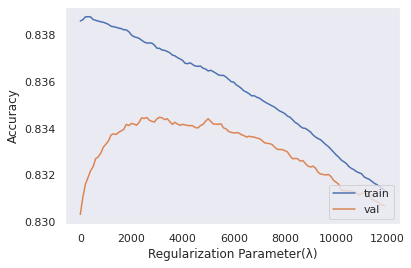

In [129]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [130]:
np.argmax(val_scores)

31

In [131]:
val_scores[23]

0.834254635100962

In [132]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.8299721703328123


In [133]:
pred_Y= model.predict(X_test)
print(pred_Y )

[1 1 0 ... 1 1 1]


In [134]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': pred_Y})
df_results.head()

,Actual,Predicted
256242,0,1
119039,0,1
358611,0,0
311006,1,1
29565,1,1


In [135]:
errors=df_results['Predicted']-df_results['Actual']
errors

256242    1
119039    1
358611    0
311006    0
29565     0
         ..
361150    0
359070    0
105295    1
168623    0
185016    0
Length: 78693, dtype: int64

Text(0.5, 0, 'Prediction Level')

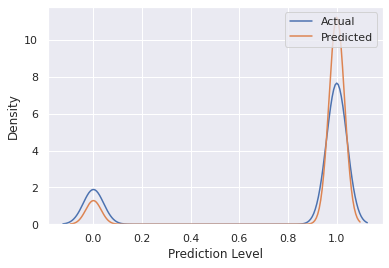

In [136]:
sns.distplot(df_results['Actual'], hist=False, label='Actual')
sns.distplot(df_results['Predicted'], hist=False, label='Predicted')
plt.legend(loc='upper right')
plt.xlabel('Prediction Level')

Text(0.5, 1.0, 'Histogram of residuals')

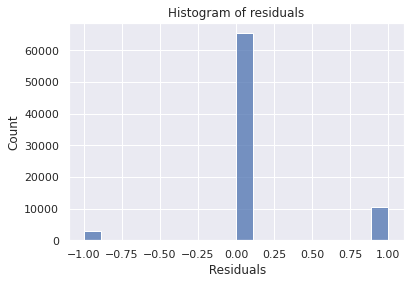

In [137]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [140]:
y_pred = scaled_lr.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, pred_Y)
cm  

array([[ 5164, 10403],
       [ 2927, 60199]])

In [142]:
precision_score(y_test, y_pred)

0.8342606031285277

In [143]:

recall_score(y_test, y_pred)

0.983414124132687

In [144]:
f1_score(y_test, y_pred)

0.9027177943550146

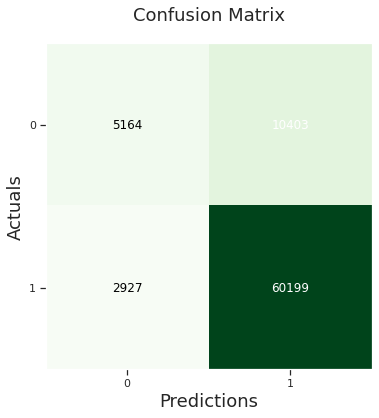

In [147]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [148]:

# Estimate the probability of belonging to Class 1
probs = model.predict_proba(X_test)[:, 1]

0.7804644106992196

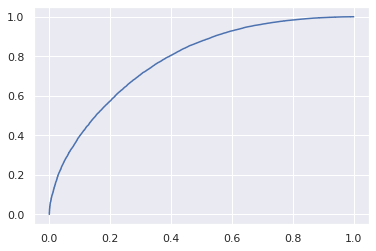

In [149]:

from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thres = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
roc_auc_score(y_test, probs)

## Insights

* 35% of the profiles where not verfied and 65% of the profiles is Verfied 
* Intial list Status is fractions(f) has around 60% and 40% is in whole(w)
* Grade with B,C,D has more loan issued than other grades.And same occur for the sub_grades also.
* house_ownership with rent and mortage are very higher than own houses.
* Almost more than 90% Application are individual type rather than joint or direct_pay
* In the month of Oct, jul, nov we have more loan issued on these month
* And 2013,2014 and 2015 has many loan issued when compared to other years
* pin with below region 22690 30723 70466 and 48052 has more loan issued
* Around 60% of the Employment Experience is has 10 year experience.
*  debt_consolidation, Credit_card, Home_imporvement is the highest purpose for taking loan  
* profile with grade C,D has more defaulter when compared to other Grade.

* 11650, 86630, and 93700 has many deafaulter when compared to other region 
* AE, AP and AA has more loan issued to this city code.
* int_rate for full paid is less and charged off has a slight increase in int_rate    

### Questionnaire (Answers should present in the text editor along with insights):

1. What percentage of customers have fully paid their Loan Amount?
  * Around 79.89% has fully paid their loan 
2. Comment about the correlation between Loan Amount and Installment features.
  * correlation between Loan Amount and Installment is 0.95 because both feature directly proportional. If we increase loan amt installment also increases.
3. The majority of people have home ownership as 
  * Rent and mortgage .
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
  * Yes True, But there very less percentage of defaulter 
5. Name the top 2 afforded job titles.
  * Teacher, Manager most afforded job.
6. Thinking from a bank's perspective, which metric should our primary focus be on..
  * ROC AUC - 78%
   * Precision - 83.42%
  * Recall  - 98.34% 
  * F1 Score  - 90.27%
7. How does the gap in precision and recall affect the bank?
  * We have to consider the recall than precision.    
8. Which were the features that heavily affected the outcome?
  * Installment, Income Amt
9. Will the results be affected by geographical location? (Yes/No)
  * Yes 

# Recommendations

Based on the above observations and insights, some of the recommendations to consider are: 
*  Profile with Grade B & C
* Applicant with Type Individual
* Lower loan duration like 36 months
* Employees with job for longer duration like 10 yrs
* Applicants with 'verified status'
* People with less mortgage accounts